# Reading Data

Data
https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/

In [67]:
import pandas as pd

In [68]:
HDNames = ['Cement', 'BFS', 'FLA', 'Water', 'SP', 'CA', 'FA', 'Age', 'CCS']

In [69]:
Data = pd.read_excel('Concrete_Data.xls', names=HDNames)

# Exploratory analysis

In [70]:
print(Data.head(20))

    Cement    BFS  FLA  Water   SP      CA     FA  Age        CCS
0    540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  79.986111
1    540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  61.887366
2    332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  40.269535
3    332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  41.052780
4    198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  44.296075
5    266.0  114.0  0.0  228.0  0.0   932.0  670.0   90  47.029847
6    380.0   95.0  0.0  228.0  0.0   932.0  594.0  365  43.698299
7    380.0   95.0  0.0  228.0  0.0   932.0  594.0   28  36.447770
8    266.0  114.0  0.0  228.0  0.0   932.0  670.0   28  45.854291
9    475.0    0.0  0.0  228.0  0.0   932.0  594.0   28  39.289790
10   198.6  132.4  0.0  192.0  0.0   978.4  825.5   90  38.074244
11   198.6  132.4  0.0  192.0  0.0   978.4  825.5   28  28.021684
12   427.5   47.5  0.0  228.0  0.0   932.0  594.0  270  43.012960
13   190.0  190.0  0.0  228.0  0.0   932.0  670.0   90  42.326932
14   304.0

In [71]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement    1030 non-null float64
BFS       1030 non-null float64
FLA       1030 non-null float64
Water     1030 non-null float64
SP        1030 non-null float64
CA        1030 non-null float64
FA        1030 non-null float64
Age       1030 non-null int64
CCS       1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [72]:
summary = Data.describe()
print(summary)

            Cement          BFS          FLA        Water           SP  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean    281.165631    73.895485    54.187136   181.566359     6.203112   
std     104.507142    86.279104    63.996469    21.355567     5.973492   
min     102.000000     0.000000     0.000000   121.750000     0.000000   
25%     192.375000     0.000000     0.000000   164.900000     0.000000   
50%     272.900000    22.000000     0.000000   185.000000     6.350000   
75%     350.000000   142.950000   118.270000   192.000000    10.160000   
max     540.000000   359.400000   200.100000   247.000000    32.200000   

                CA           FA          Age          CCS  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918592   773.578883    45.662136    35.817836  
std      77.753818    80.175427    63.169912    16.705679  
min     801.000000   594.000000     1.000000     2.331808  
25%     932.000000   730.950000  

# Data visualisation

In [73]:
import seaborn as sns

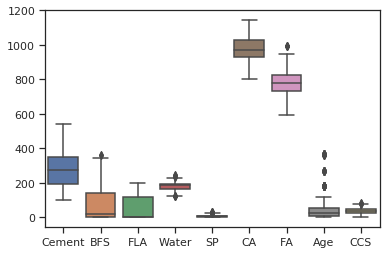

In [74]:
sns.set(style='ticks')
sns.boxplot(data = Data)

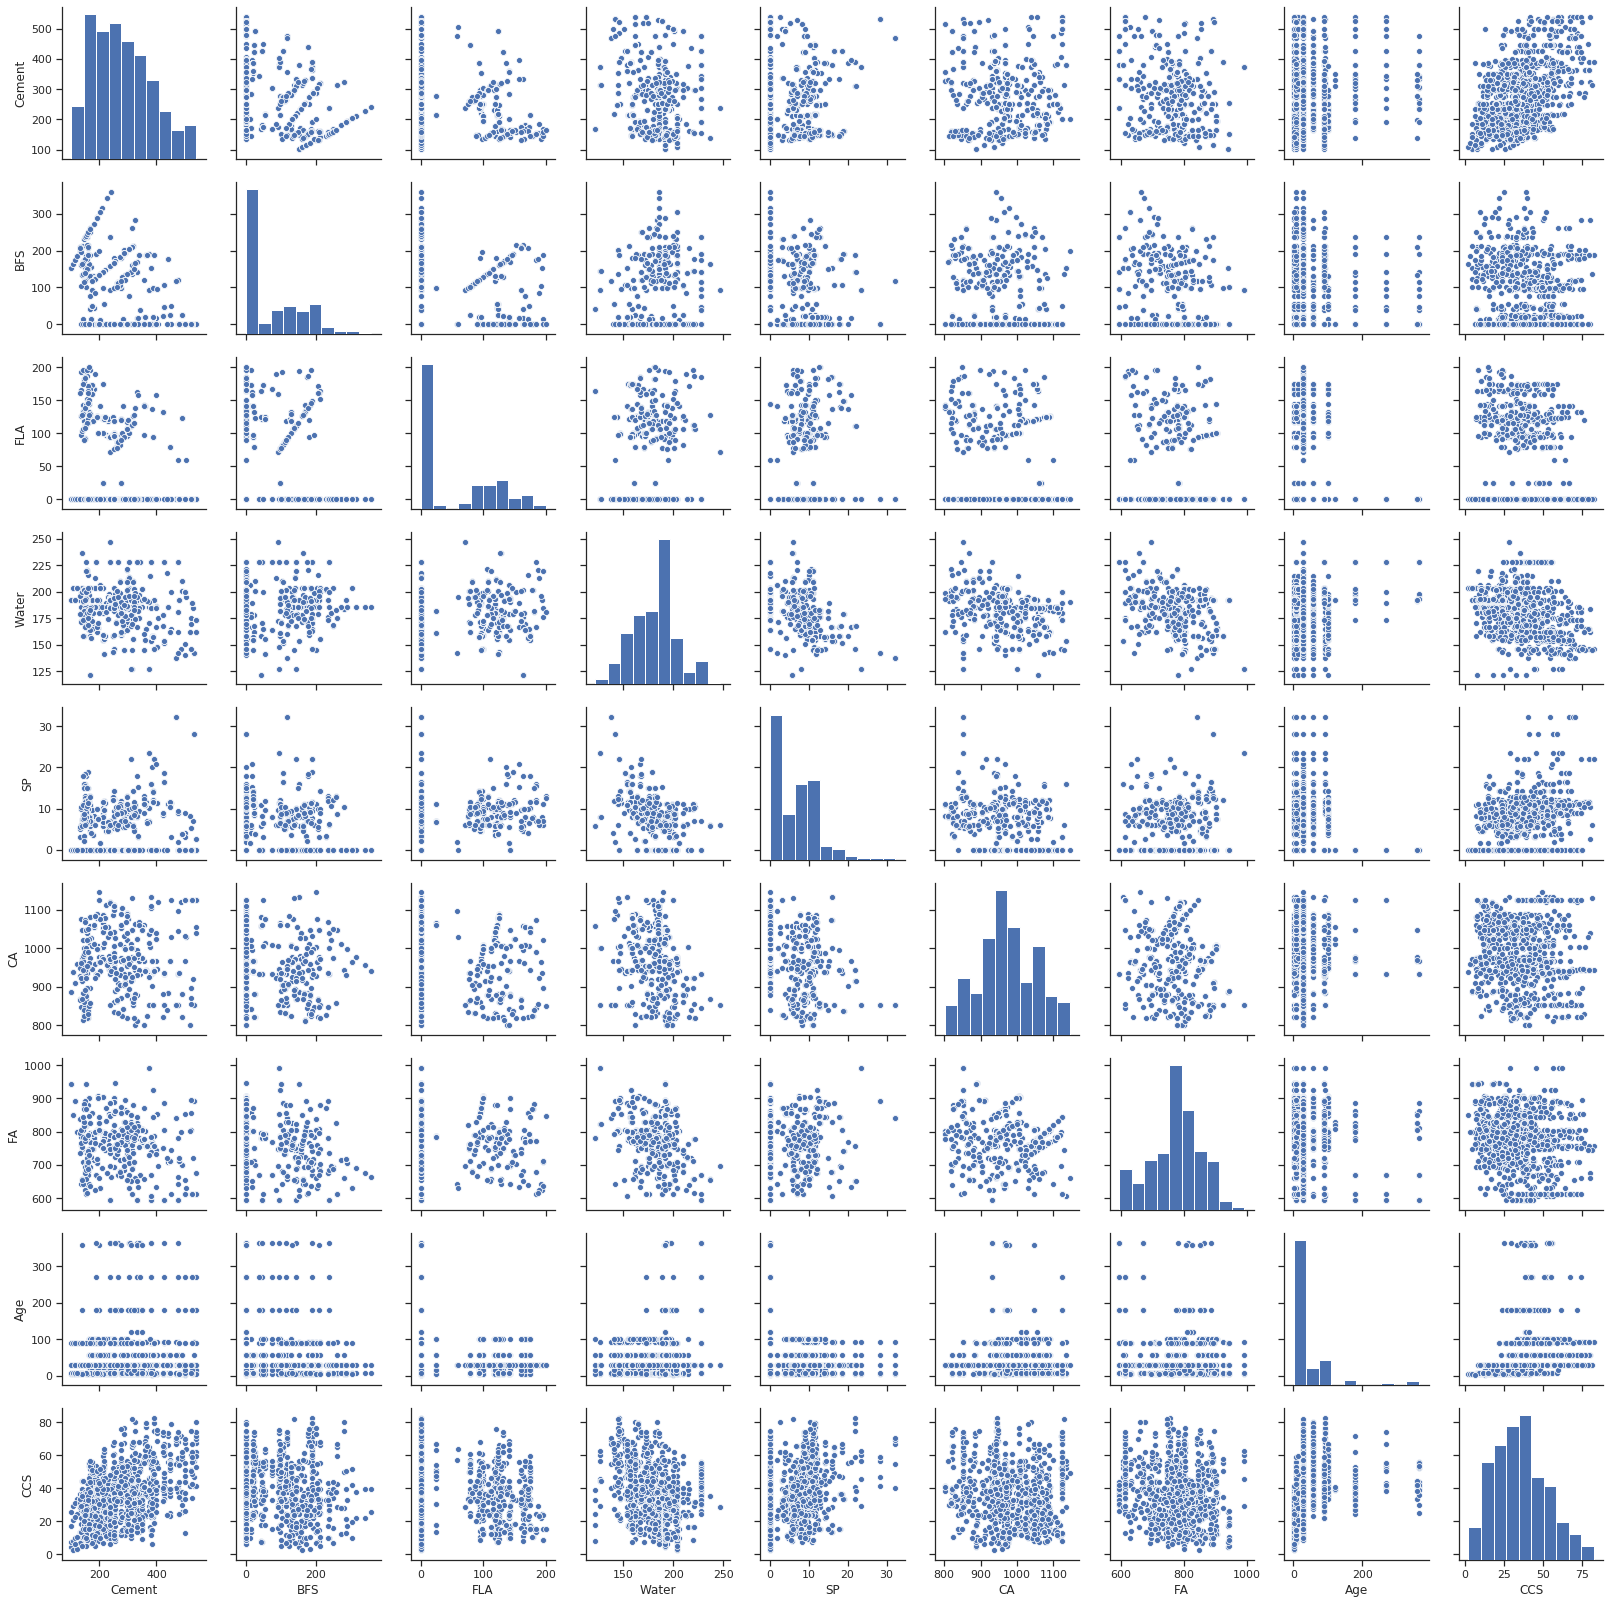

In [75]:
sns.pairplot(data = Data)

# Data scaling

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = MinMaxScaler()

In [78]:
print(scaler.fit(Data))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [79]:
DataScaled = scaler.fit_transform(Data)

In [80]:
DataScaled = pd.DataFrame(DataScaled, columns=HDNames)

In [81]:
summary = DataScaled.describe()
print(summary)

            Cement          BFS          FLA        Water           SP  \
count  1030.000000  1030.000000  1030.000000  1030.000000  1030.000000   
mean      0.409054     0.205608     0.270800     0.477576     0.192643   
std       0.238601     0.240064     0.319822     0.170504     0.185512   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.206336     0.000000     0.000000     0.344511     0.000000   
50%       0.390183     0.061213     0.000000     0.504990     0.197205   
75%       0.566210     0.397746     0.591054     0.560878     0.315528   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                CA           FA          Age          CCS  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean      0.499763     0.450524     0.122698     0.417181  
std       0.226029     0.201143     0.173544     0.208125  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.380814     0.343578  

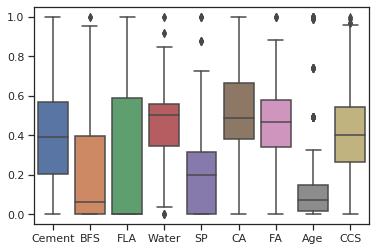

In [82]:
sns.boxplot(data = DataScaled)

# Building a Keras deeplearning neural network model

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
Predictors = pd.DataFrame(DataScaled.iloc[:,:8])

In [85]:
Response = pd.DataFrame(DataScaled.iloc[:,8])

In [86]:
print(Predictors.head(20))

      Cement       BFS  FLA     Water       SP        CA        FA       Age
0   1.000000  0.000000  0.0  0.321357  0.07764  0.694767  0.205720  0.074176
1   1.000000  0.000000  0.0  0.321357  0.07764  0.738372  0.205720  0.074176
2   0.526256  0.396494  0.0  0.848303  0.00000  0.380814  0.000000  0.739011
3   0.526256  0.396494  0.0  0.848303  0.00000  0.380814  0.000000  1.000000
4   0.220548  0.368392  0.0  0.560878  0.00000  0.515698  0.580783  0.986264
5   0.374429  0.317195  0.0  0.848303  0.00000  0.380814  0.190667  0.244505
6   0.634703  0.264329  0.0  0.848303  0.00000  0.380814  0.000000  1.000000
7   0.634703  0.264329  0.0  0.848303  0.00000  0.380814  0.000000  0.074176
8   0.374429  0.317195  0.0  0.848303  0.00000  0.380814  0.190667  0.074176
9   0.851598  0.000000  0.0  0.848303  0.00000  0.380814  0.000000  0.074176
10  0.220548  0.368392  0.0  0.560878  0.00000  0.515698  0.580783  0.244505
11  0.220548  0.368392  0.0  0.560878  0.00000  0.515698  0.580783  0.074176

In [87]:
print(Response.head(20))

         CCS
0   0.967445
1   0.741964
2   0.472642
3   0.482400
4   0.522806
5   0.556864
6   0.515358
7   0.425029
8   0.542219
9   0.460436
10  0.445292
11  0.320054
12  0.506820
13  0.498273
14  0.566631
15  0.630100
16  0.461286
17  0.670386
18  0.476301
19  0.501933


In [88]:
Pred_train, Pred_test, Resp_train, Resp_test = train_test_split(Predictors, Response, test_size = 0.30, random_state = 1)

In [89]:
print(Pred_train.shape)
print(Pred_test.shape)
print(Resp_train.shape)
print(Resp_test.shape)

(721, 8)
(309, 8)
(721, 1)
(309, 1)


In [90]:
from keras.models import Sequential
from keras.layers import Dense

In [91]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [92]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [93]:
model.fit(Pred_train, Resp_train, epochs=1000, verbose=0)

In [94]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [95]:
from sklearn.metrics import r2_score

In [96]:
Y_predKM = model.predict(Pred_test)

In [97]:
print('Coefficient of determination of Keras Model')
print(r2_score(Resp_test, Y_predKM))

Coefficient of determination of Keras Model
0.8487154606693794


# Impoving the model performance by removing outliers

In [98]:
Q1 = DataScaled.quantile(0.25)
Q3 = DataScaled.quantile(0.75)

In [99]:
IQR = Q3 - Q1
print(IQR)

Cement    0.359874
BFS       0.397746
FLA       0.591054
Water     0.216367
SP        0.315528
CA        0.283140
FA        0.233442
Age       0.134615
CCS       0.279431
dtype: float64


In [100]:
DataScaledOut = DataScaled[~((DataScaled < (Q1 - 1.5 * IQR)) | (DataScaled > (Q3 + 1.5 * IQR))).any(axis=1)]
DataScaledOut.shape

(941, 9)

Text(0.5, 1.0, 'Data without outliers')

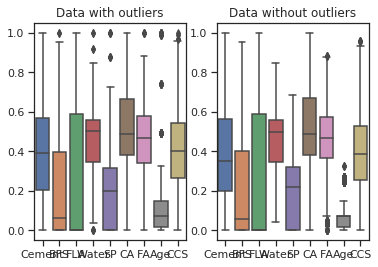

In [101]:
import matplotlib.pyplot as plt
plt.figure(1)

plt.subplot(121)
sns.boxplot(data = DataScaled)
plt.title('Data with outliers')

plt.subplot(122)
sns.boxplot(data = DataScaledOut)
plt.title('Data without outliers')

In [102]:
Predictors2 = pd.DataFrame(DataScaledOut.iloc[:, :8])
Response2 = pd.DataFrame(DataScaledOut.iloc[:, 8])

In [103]:
Pred_train2, Pred_test2, Resp_train2, Resp_test2 = train_test_split(Predictors2, Response2, test_size = 0.30, random_state = 1)

In [104]:
print(Pred_train2.shape)
print(Pred_test2.shape)
print(Resp_train2.shape)
print(Resp_test2.shape)

(658, 8)
(283, 8)
(658, 1)
(283, 1)


In [105]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [106]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [107]:
model.fit(Pred_train2, Resp_train2, epochs=1000, verbose=0)

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [109]:
Y_predKM2 = model.predict(Pred_test2)

In [110]:
print('Coefficient of determination of Keras Model')
print(r2_score(Resp_test, Y_predKM))

Coefficient of determination of Keras Model
0.8487154606693794


In [111]:
print('Coefficient of determination of Keras Model without outliers')
print(r2_score(Resp_test2, Y_predKM2))

Coefficient of determination of Keras Model without outliers
0.8715695037265055


Text(0.5, 1.0, 'Data without outliers')

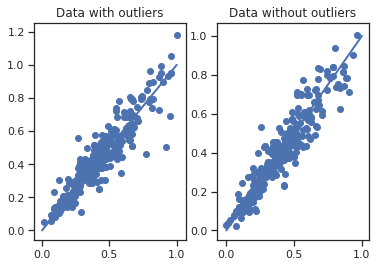

In [112]:
plt.figure(1)
plt.subplot(121)
plt.scatter(Resp_test, Y_predKM)
plt.plot([0,1], [0,1], linewidth=2)
plt.title('Data with outliers')


plt.subplot(122)
plt.scatter(Resp_test2, Y_predKM2)
plt.plot([0,1], [0,1], linewidth=2)
plt.title('Data without outliers')